In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import h5py
import requests
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import tensorflow as tf

In [4]:
#ZIP_PATH = "https://drive.google.com/drive/folders/1jzHYpTwywUYA53nMGHVROSuVO14hEueq?usp=sharing/"
FILE_NAME ="SynthText_train.h5"

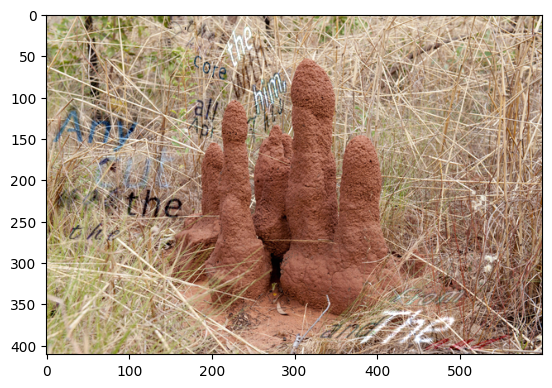

In [5]:

db = h5py.File(FILE_NAME, 'r')

im_names = list(db['data'].keys())
#im = im_names[0]
#print(im_names)
# im = 'dog_136.jpg_0'
im = 'ant+hill_102.jpg_0'
img  = db['data'][im][:]
#img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#print(img.shape)
plt.imshow(img)
#plt.show()
#print(im_names[0])
font = db['data'][im].attrs['font']
#print(font)
txt = db['data'][im].attrs['txt']
#print(txt)
charBB = db['data'][im].attrs['charBB']
#print(charBB)
wordBB = db['data'][im].attrs['wordBB']
#print(wordBB)


In [6]:
def sort_points(points, center):
    # calculate the angle of each point from the center point
    angles = np.arctan2(points[:, 1] - center[1], points[:, 0] - center[0])
    # sort the points by angle
    sorted_points = points[np.argsort(angles)]
    return sorted_points

In [7]:
def draw_points(image, points, color=(255, 0, 0), radius=3):
    # create a copy of the image
    img = image.copy()
    # iterate over the points and draw them on the image
    for point in points:
        cv2.circle(img, tuple(map(int, point)), radius, color, -1)
    return img

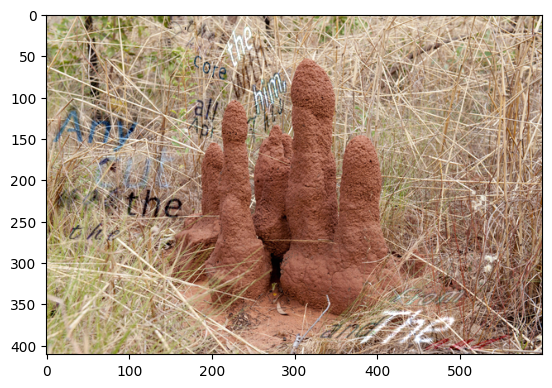

[[[374.43994   172.2088    234.93724    97.9541    455.5406
   144.66496   210.19315     8.866821  413.4365    173.5921
   226.41144    11.577812  325.68387   177.85944   204.6012
    27.289658  180.64723    58.07405  ]
  [500.64325   212.34793   274.55045   166.34592   559.17725
   210.47935   255.98123   118.41127   511.07407   210.85373
   274.6277     98.34717   412.15952   224.34497   238.31384
    91.92047   208.85966   155.62517  ]
  [500.91962   204.44568   296.854     165.54858   559.3799
   199.66835   283.8968    110.854706  511.66928   200.91724
   296.9129     97.76158   413.49454   215.80655   261.52252
    91.40761   205.9582    155.03975  ]
  [374.7163    164.30655   257.2408     97.15677   455.74323
   133.85396   238.1087      1.3102577 414.0317    163.65561
   248.69666    10.992225  327.0189    169.32101   227.80988
    26.776793  177.74577    57.48863  ]]

 [[356.9052      2.1513977 100.584816  212.5633    388.95026
     3.2777977  92.29002   110.9371    332.2555  

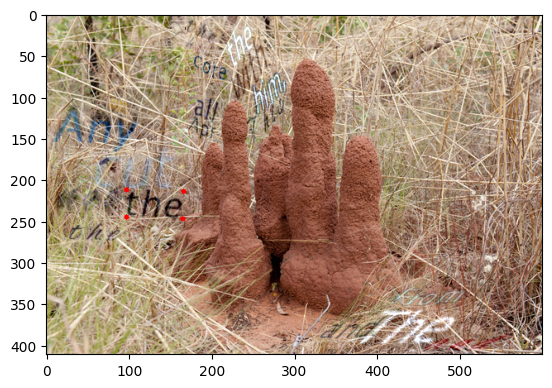

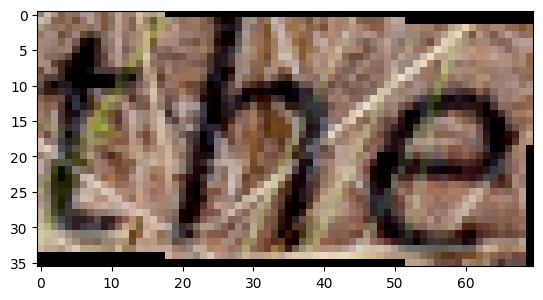

'\n# define the four bounding points\npoints = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])\nprint(points)\nprint(txt[WORD])\n# calculate the center point of the bounding box\ncenter = tuple(np.mean(points, axis=0).astype(np.int32))\n# sort the points in a clockwise order, starting from the top-left point\npoints = sort_points(points, center)\nprint(points)\n\n# calculate the angle of rotation\ns = np.linalg.norm(points[1]-points[0])\ns_next = np.linalg.norm(points[2]-points[1])\nprint(s, s_next)\ncos_angle = min(max(s/s_next, -1), 1)\nangle = np.degrees(np.arccos(cos_angle))-90\nprint(angle)\n\n# rotate the image\nrows,cols = img.shape[:2]\nM = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)\nimg_rotated = cv2.warpAffine(img,M,(cols,rows))\nplt.imshow(img_rotated)\nplt.show()\n\n# calculate the width and height of the bounding box\nheight = int(np.linalg.norm(points[1]-points[0]))\nwidth = int(np.linalg.norm(points[2]-points[1]))\nprint(width, height)\n# define the destinatio

In [8]:

plt.imshow(img)
plt.show()
#x = wordBB[0][0][1]
#y= wordBB[0][1][1]
#print(x,y)
WORD = 3
print(wordBB)
print(wordBB.shape)
x1 = int(wordBB[0,0,WORD])
y1 = int(wordBB[1,0,WORD])

print(x1)
print(y1)
x2 = int(wordBB[0,1,WORD])
y2 = int(wordBB[1,1,WORD])

#print(y1)
#print(y2)
x3 = int(wordBB[0,2,WORD])
y3 = int(wordBB[1,2,WORD])
#print(x1)
#print(x2)
x4 = int(wordBB[0,3,WORD])
y4 = int(wordBB[1,3,WORD])
#print(y3)
#print(y4)
"""
top_left_x = min([x1,x2,x3,x4])
top_left_y = min([y1,y2,y3,y4])
bot_right_x = max([x1,x2,x3,x4])
bot_right_y = max([y1,y2,y3,y4])
#print(str(top_left_x)+','+str(bot_right_x))
#print(str(top_left_y)+','+str(bot_right_y))
"""
top_left_x = min([x1,x2,x3,x4])
top_left_y = min([y1,y2,y3,y4])
bot_right_x = max([x1,x2,x3,x4])
bot_right_y = max([y1,y2,y3,y4])
print(charBB)
points = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
print(points)
pointed  = draw_points(img, points)
plt.imshow(pointed)
plt.show()

# create an empty image with the same shape as the input image
mask = np.zeros_like((img))

# create a list of the bounding box points in the correct format
bounding_box = np.array([points], dtype=np.int32)

# fill the area inside the bounding box with white
cv2.fillPoly(mask, bounding_box, (255, 255, 255))

# apply the mask to the image
res = cv2.bitwise_and(img, mask)[top_left_y:bot_right_y+1, top_left_x:bot_right_x+1]

#res = img[top_left_y:bot_right_y+1, top_left_x:bot_right_x+1]

#flipping
if(x2 < x1):
    res = cv2.flip(res, 1)
if(y2 < y1):
    res = cv2.flip(res, 0)
#rotate


plt.imshow(res)
plt.show()
#print(chr(txt[0][0]))
#print(txt)
#print(wordBB)
# define the four bounding points
"""
# define the four bounding points
points = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
print(points)
print(txt[WORD])
# calculate the center point of the bounding box
center = tuple(np.mean(points, axis=0).astype(np.int32))
# sort the points in a clockwise order, starting from the top-left point
points = sort_points(points, center)
print(points)

# calculate the angle of rotation
s = np.linalg.norm(points[1]-points[0])
s_next = np.linalg.norm(points[2]-points[1])
print(s, s_next)
cos_angle = min(max(s/s_next, -1), 1)
angle = np.degrees(np.arccos(cos_angle))-90
print(angle)

# rotate the image
rows,cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
img_rotated = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(img_rotated)
plt.show()

# calculate the width and height of the bounding box
height = int(np.linalg.norm(points[1]-points[0]))
width = int(np.linalg.norm(points[2]-points[1]))
print(width, height)
# define the destination points for the perspective transform
dst = np.float32([[0,0],[width,0],[width,height],[0,height]])
print(dst)

# create a copy of the points
points_rotated = points.copy()
angle = 90-angle
print(points)
# rotate the points
for i in range(4):
    x, y = points_rotated[i, :]
    print(x,y)
    x_rotated = (x - cols/2) * np.cos(angle) - (y - rows/2) * np.sin(angle) + cols/2
    y_rotated = (x - cols/2) * np.sin(angle) + (y - rows/2) * np.cos(angle) + rows/2
    points_rotated[i, :] = [x_rotated, y_rotated]
print(points_rotated)
# calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(points_rotated, dst)

# apply the perspective transform
img_cropped = cv2.warpPerspective(img_rotated, M, (width, height))
plt.imshow(img_cropped)
plt.show()
"""

In [9]:
def get_bb(img, bbs, indx):
    x1 = int(bbs[0,0,indx])
    y1 = int(bbs[1,0,indx])
    x2 = int(bbs[0,1,indx])
    y2 = int(bbs[1,1,indx])
    x3 = int(bbs[0,2,indx])
    y3 = int(bbs[1,2,indx])
    x4 = int(bbs[0,3,indx])
    y4 = int(bbs[1,3,indx])
    # calculate bounding rectangle
    top_left_x = max(0, min([x1,x2,x3,x4]))
    top_left_y = max(0, min([y1,y2,y3,y4]))
    bot_right_x = max(0, max([x1,x2,x3,x4]))
    bot_right_y = max(0, max([y1,y2,y3,y4]))
    points = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    
    # create an empty image with the same shape as the input image
    mask = np.zeros_like(img[:,:,0])
    # create a list of the bounding box points in the correct format
    bounding_box = np.array([points], dtype=np.int32)
    # fill the area inside the bounding box with white
    cv2.fillPoly(mask, bounding_box, 255)
    # apply the mask to the image
    ####res = cv2.bitwise_and(img, mask)
    # try1 = np.array(np.where(mask == 255, 255, 0), dtype=np.uint8)
    # print(x)
    # inv_mask = cv2.bitwise_not(mask)
    # res2 = cv2.bitwise_and(img, inv_mask)
    # bb2 = np.int32([[top_left_x, bot_right_y], [bot_right_x, bot_right_y],[bot_right_x,top_left_y], [top_left_x,top_left_y]])
    # print(bb2)
    # mask2 = np.zeros_like(img)
    # # bb2 = np.array(frame, dtype=np.int32)
    # cv2.fillPoly(mask2, bb2, (255, 255, 255))
    mask = mask[top_left_y:bot_right_y+1, top_left_x:bot_right_x+1]
    res = img[top_left_y:bot_right_y+1, top_left_x:bot_right_x+1]

    #res = img[top_left_y:bot_right_y+1, top_left_x:bot_right_x+1]
    #flipping
    """"if(x2 < x1):
        res = cv2.flip(res, 1)
    if(y2 < y1):
        res = cv2.flip(res, 0)
    plt.imshow(mask)
    plt.show()
    print(mask.shape)"""
    return res, mask

In [108]:

def prepare_img(img, bbs, index, size):
    cropped, mask = get_bb(img, bbs, index)
    cropped = cv2.GaussianBlur(np.array(cropped), (3, 3), 0)
    # plt.imshow(cropped)
    # plt.show()
    # cropped = tf.image.convert_image_dtype(cropped, tf.float32)
    
    cropped = tf.cast(cropped, tf.int32)
    plt.imshow(cropped)
    plt.show()
    # gray_mask = tf.image.rgb_to_grayscale(mask)
    # print(mask.shape)
    # print(cropped.shape)
    cropped = tf.image.rgb_to_grayscale(cropped)
    cropped = tf.cast(cropped, tf.float32)
    
    # print(cropped.shape)
    cropped = tf.expand_dims(cropped, 0)
    mask = tf.expand_dims(mask, 2)
    # mask = tf.image.resize_with_pad(mask, size, size)
    # print(cropped.shape)
    # print(cropped.shape)
    cropped = tf.image.sobel_edges(cropped)
    cropped = cropped**2
    # print(cropped.shape)
    cropped = tf.math.reduce_sum(cropped,axis=-1) # sum all magnitude components
    cropped = tf.sqrt(cropped) # this is the image tensor you want
    # print(cropped[0, :, :, :].shape)
    # plt.imshow(cropped[0, :, :, :], cmap='gray')
    # plt.show()
    cropped = cropped[0, :, :, :]
    # plt.imshow(cropped, cmap ='gray')
    # plt.show()
    # plt.imshow(mask, cmap ='gray')
    # plt.show()
    # print(cropped.shape)
    # print(gray_mask.shape)
#    cropped = tf.cast(cropped, tf.int32)
#    mask = tf.cast(mask, tf.int32)
    # print(gray_mask)
    # res = tf.multiply(cropped, mask)
    
    # plt.imshow(mask, cmap ='gray')
    # plt.show()
    cropped = tf.image.resize_with_pad(cropped, size, size)
    plt.imshow(cropped, cmap ='gray')
    plt.show()
    
    return cropped#res
    # blurred = cv2.GaussianBlur(cropped,(3,3),0)
    # gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY).squeeze().astype(np.uint8)
    # gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY).squeeze().astype(np.uint8)
    # img_laplacian = cv2.Laplacian(np.array(gray),cv2.CV_8U)
    # res = cv2.bitwise_and(img_laplacian, gray_mask)
    # res = cv2.resize(res, (64,64),interpolation = cv2.INTER_AREA)
    # return res.reshape((64,64,1))

[b'The' b'the' b'him,' b'the' b'and' b'This' b'with' b'Any' b'From' b'Apr'
 b'This' b'not' b'and' b'core' b'the' b'the' b'all' b'cut']


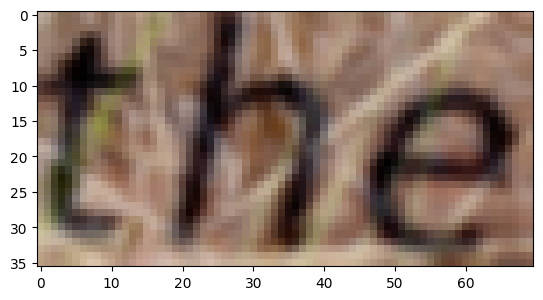

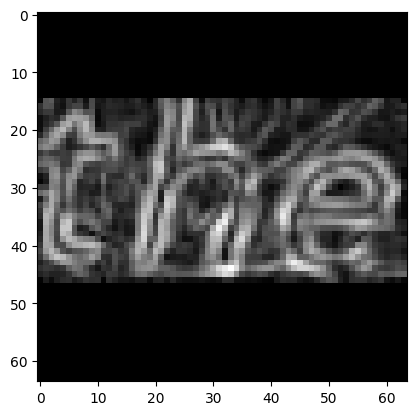

In [119]:
# ant+hill_102.jpg_0
print(txt)
res = prepare_img(img, wordBB, 3, 64)

In [120]:
# plt.imshow(res, cmap='gray')